<a href="https://colab.research.google.com/github/JuneWayne/DS3021-EDA/blob/main/assignment/Ethan_Cao_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

Amount of foreign gifts received that are 0 dollars:  0


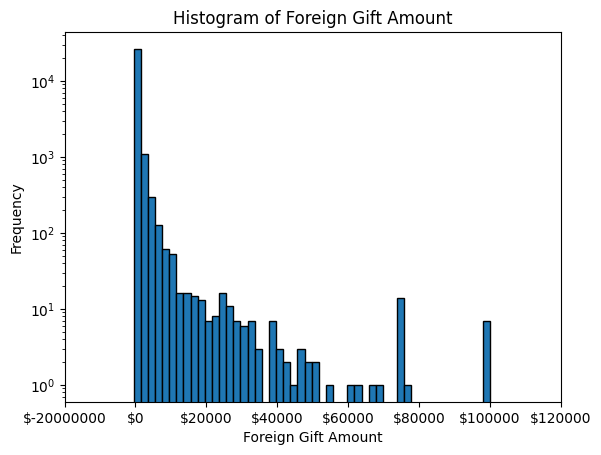

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 1
df1 = pd.read_csv('ForeignGifts_edu.csv')

# 2
print('Amount of foreign gifts received that are 0 dollars: ',df1[df1['Foreign Gift Amount'] == 0].value_counts().sum())
plt.hist(df1['Foreign Gift Amount'], bins=50, edgecolor='black', log=True)
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Frequency')
xticks = plt.xticks()[0]
xtick_labels = [f"${int(x/1000)}" if x >= 1000 else f"${int(x)}" for x in xticks]
plt.xticks(xticks, xtick_labels)
plt.title('Histogram of Foreign Gift Amount')
plt.show()

### According to the histogram, with its data scaled in logarithms to show better clarity, it seems like the majority of foreign gifts are absent, followed by a range of foreign gifts ranging from 0 to 38,000 dollars in between, as well as 'sporadic' foreign donations with a quite high volume of money at near 75,000 to 100,000 dollars, with a higher frequency than the cluster of lower volume money donations in the front.

Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64
Proportion of Contractual gifts are:61.21%
Proportion of Monetary gifts are:38.75%
Proportion of Real Estate gifts are:0.04%


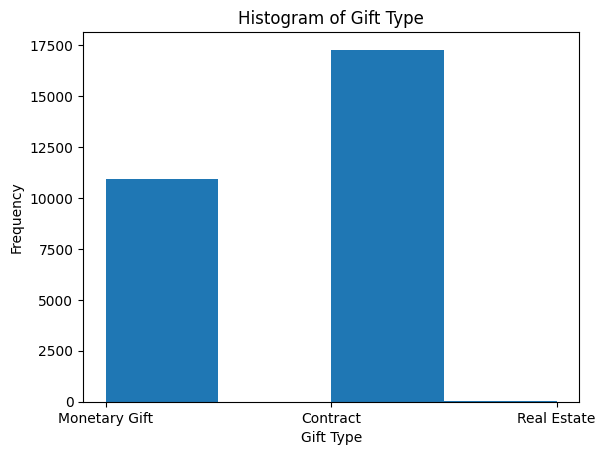

In [3]:
#4
print(df1['Gift Type'].value_counts())
plt.hist(df1['Gift Type'], bins=4)
contract_prop = df1[df1['Gift Type'] == 'Contract'].shape[0] / df1.shape[0]
monetary_prop = df1[df1['Gift Type'] == 'Monetary Gift'].shape[0] / df1.shape[0]
print(f"Proportion of Contractual gifts are:{round(contract_prop*100, 2)}%\nProportion of Monetary gifts are:{round(monetary_prop*100,2)}%\nProportion of Real Estate gifts are:{round((1-contract_prop-monetary_prop)*100,2)}%")
plt.xlabel('Gift Type')
plt.ylabel('Frequency')
plt.title('Histogram of Gift Type')
plt.show()

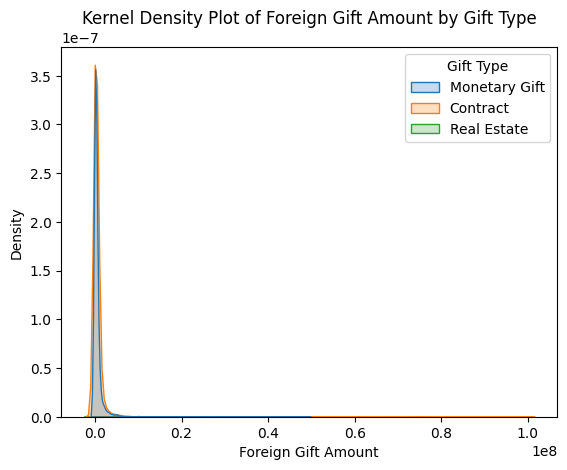

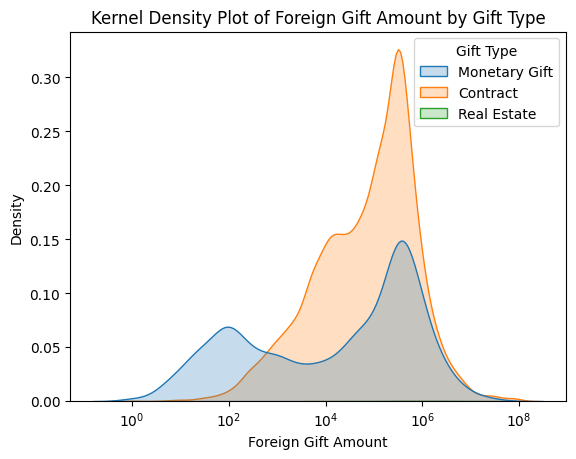

In [4]:
from logging import log
#4
sns.kdeplot(data=df1, x='Foreign Gift Amount', hue='Gift Type', fill=True)
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Foreign Gift Amount by Gift Type')
plt.show()
sns.kdeplot(data=df1, x='Foreign Gift Amount', hue='Gift Type', log_scale=True, fill=True)
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Foreign Gift Amount by Gift Type')
plt.show()

### I noticed that Contract gifts are the most popular gift type, and is among one of the most expensive gifts ever given by foreign entities. This is followed by monetary gifts, in which its frequency fluctuates a bit and is not concentrated within the $10^4$ and the $10^6$ range like contract gifts did

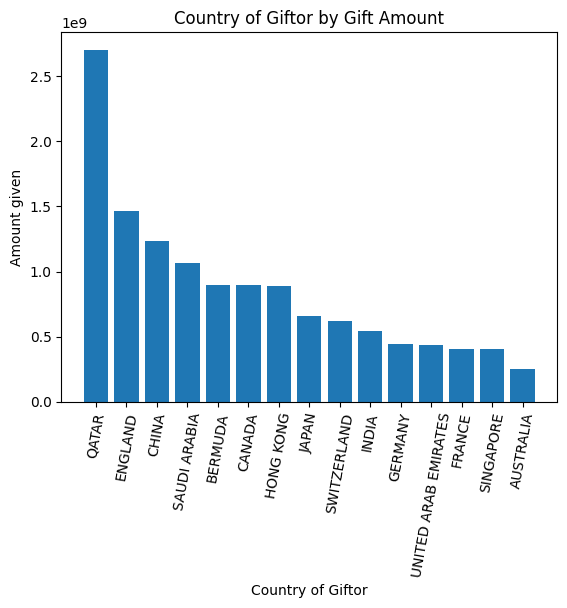

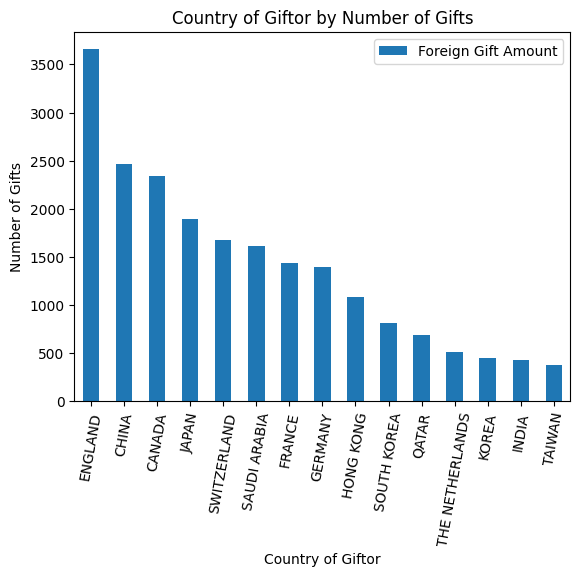

In [20]:
# 5
top_fiftheen_countries_gift_amount = df1.groupby('Country of Giftor')['Foreign Gift Amount'].sum().nlargest(15).reset_index()
plt.bar(top_fiftheen_countries_gift_amount['Country of Giftor'], top_fiftheen_countries_gift_amount['Foreign Gift Amount'])
plt.xlabel('Country of Giftor')
plt.xticks(rotation=80, ha='center')
plt.ylabel('Amount given')
plt.title('Country of Giftor by Gift Amount')
plt.show()

numer_of_gifts_by_country = df1.groupby('Country of Giftor')['Foreign Gift Amount'].count().nlargest(15).reset_index()
numer_of_gifts_by_country.plot.bar(x='Country of Giftor', y='Foreign Gift Amount')
plt.xlabel('Country of Giftor')
plt.xticks(rotation=80, ha='center')
plt.ylabel('Number of Gifts')
plt.title('Country of Giftor by Number of Gifts')
plt.show()


In [21]:
df1

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
...,...,...,...,...,...,...,...,...,...,...
28216,28217,4279700,Albert Einstein College of Medicine,Bronx,NY,42704,381717,Contract,CHINA,Chia Tai TianQing Pharmaceutical Gr
28217,28218,4279700,Albert Einstein College of Medicine,Bronx,NY,42778,444938,Contract,ISRAEL,BL Oncology Ltd
28218,28219,4279700,Albert Einstein College of Medicine,Bronx,NY,42907,1064580,Contract,ENGLAND,Roche Products Limited
28219,28220,4279700,Albert Einstein College of Medicine,Bronx,NY,42948,737375,Contract,SWITZERLAND,F Hoffman-La Roche Ltd


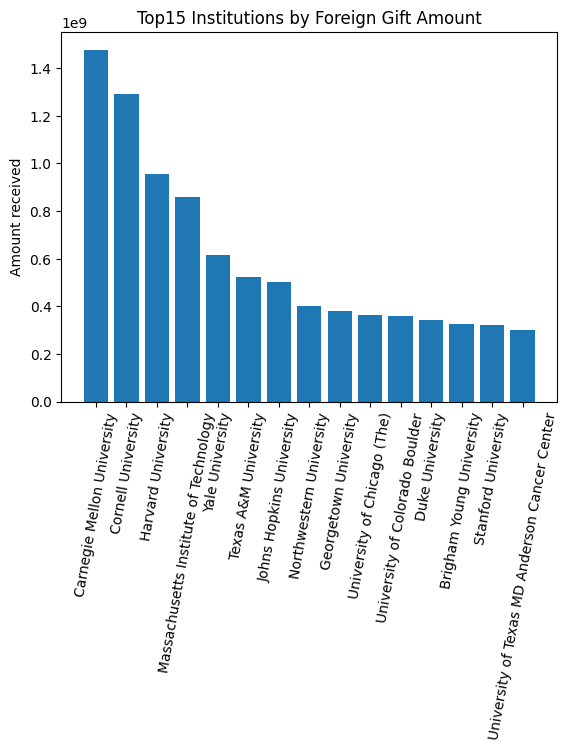

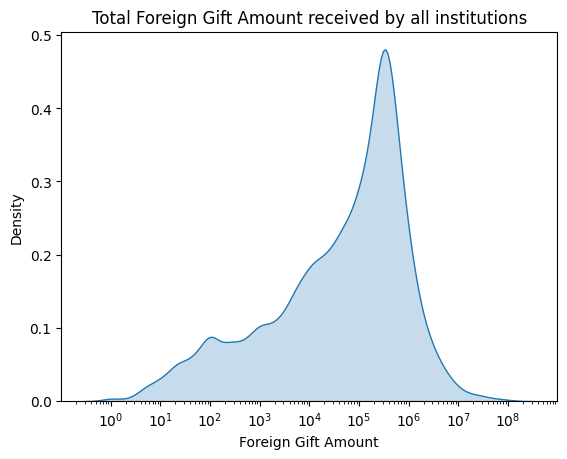

In [36]:
# 6
top_fifteen_institutions_received = df1.groupby('Institution Name')['Foreign Gift Amount'].sum().nlargest(15).reset_index()
plt.bar(top_fifteen_institutions_received['Institution Name'], top_fifteen_institutions_received['Foreign Gift Amount'])
plt.title('Top15 Institutions by Foreign Gift Amount')
plt.xticks(rotation=80, ha='center')
plt.ylabel('Amount received')
plt.show()

sns.kdeplot(data=df1, x='Foreign Gift Amount', fill=True, log_scale = True)
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Density')
plt.title('Total Foreign Gift Amount received by all institutions')
plt.show()

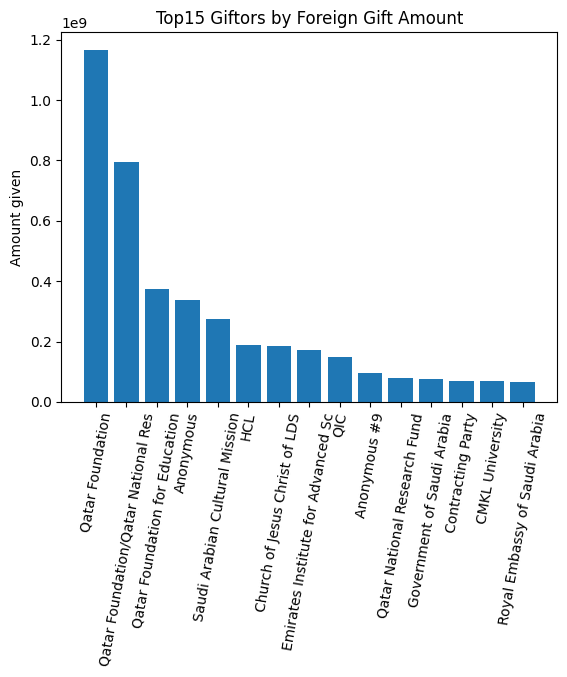

In [38]:
# 8
top_fifteen_giftors = df1.groupby('Giftor Name')['Foreign Gift Amount'].sum().nlargest(15).reset_index()
plt.bar(top_fifteen_giftors['Giftor Name'], top_fifteen_giftors['Foreign Gift Amount'])
plt.title('Top15 Giftors by Foreign Gift Amount')
plt.xticks(rotation=80, ha='center')
plt.ylabel('Amount given')
plt.show()

### According to the bar graph, the Qatar Foundation provides the most money in total compared to all other giftor institutions

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [49]:
# 1
df2 = pd.read_csv('airbnb_hw.csv')

In [45]:
# 2
print(df2.shape)
print(df2.columns)
print("number of variables:", df2.shape[1])
print("number of observations:", df2.shape[0])
print(df2.head())

(30478, 13)
Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')
number of variables: 13
number of observations: 30478
    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private r

### There are 30478 number of observations and a total of 13 variables in the data set. Variables include property type, review scores rating, room type, zipcode, beds, number of records, number of reviews, price, review scores rating

In [48]:
# 3
pd.crosstab(df2['Room Type'], df2['Property Type'])

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


### I see that there are three types of room types: Entire home/apt, private room, and shared rooms. The most available property types are apartments, followed by properties that provide bed & breakfast, houses, townhouses, condominiums, and others.

### For houses, renting a private room is more common than renting the entire property. This also appears to be true for properties that offers bed & breakfast





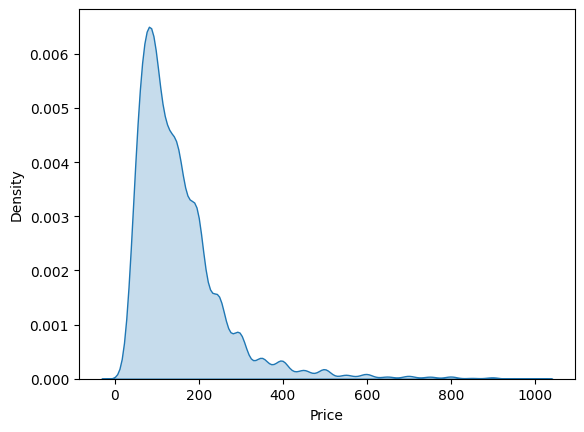

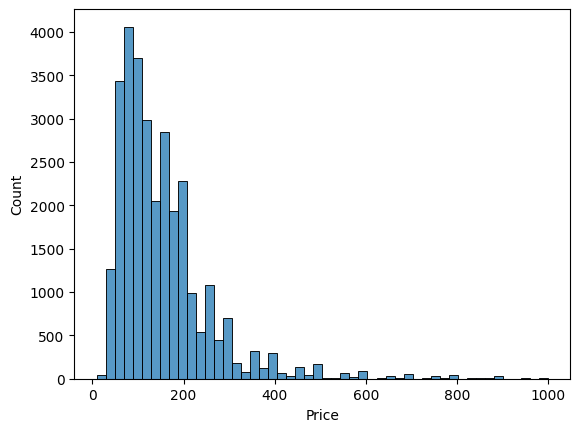

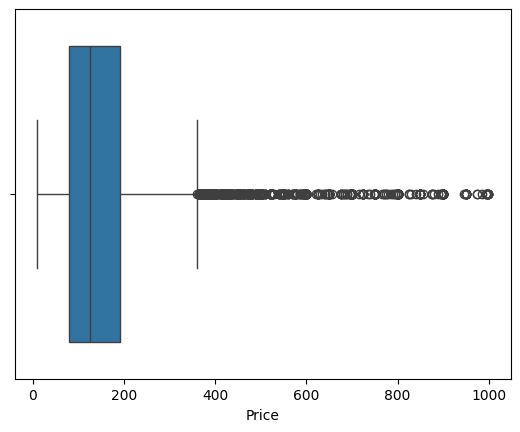

count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64


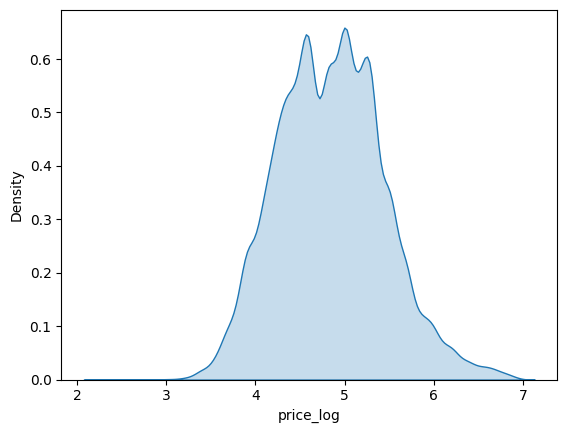

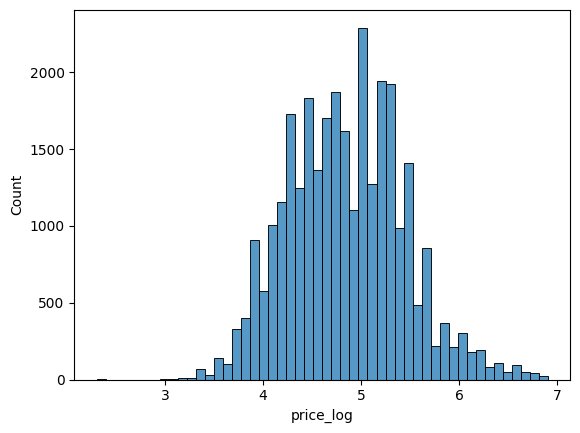

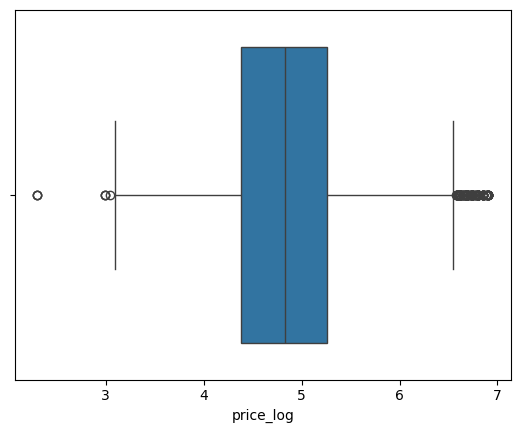

count    30297.000000
mean         4.845370
std          0.596999
min          2.302585
25%          4.382027
50%          4.828314
75%          5.257495
max          6.906755
Name: price_log, dtype: float64


In [57]:
# 4

df2['Price'] = pd.to_numeric(df2['Price'], errors='coerce')
# no logorithm adjustments
sns.kdeplot(data=df2, x='Price', fill=True)
plt.show()
sns.histplot(data=df2, x='Price', bins=50, edgecolor='black')
plt.show()
sns.boxplot(data=df2, x='Price')
plt.show()
print(df2['Price'].describe())

# adjusted by logorithm
df2['price_log'] = np.log(df2['Price'])
sns.kdeplot(data=df2, x='price_log', fill=True)
plt.show()
sns.histplot(data=df2, x='price_log', bins=50, edgecolor='black')
plt.show()
sns.boxplot(data=df2, x='price_log')
plt.show()
print(df2['price_log'].describe())

### Before the logorithmic transformation, the data is indeed badly skewed to the left according to the histogram and the kernel density plot.

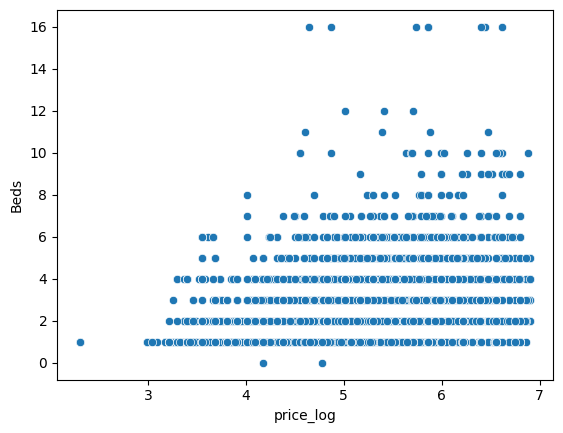

        count        mean         std    min     25%    50%     75%    max
Beds                                                                      
0.0       2.0   92.000000   38.183766   65.0   78.50   92.0  105.50  119.0
1.0   20307.0  124.757670   75.685752   10.0   75.00  100.0  155.00  950.0
2.0    6561.0  186.702332  115.044205   25.0  115.00  160.0  225.00  999.0
3.0    2029.0  234.928043  142.288189   26.0  140.00  200.0  299.00  999.0
4.0     766.0  280.554830  175.512312   27.0  150.00  240.0  363.75  999.0
5.0     274.0  322.000000  190.319415   35.0  186.00  285.0  425.00  995.0
6.0     166.0  316.313253  201.157585   35.0  183.75  271.0  399.00  900.0
7.0      45.0  341.377778  220.116631   55.0  177.00  300.0  445.00  900.0
8.0      20.0  331.850000  155.652202   55.0  218.75  339.5  408.75  750.0
9.0      14.0  587.142857  208.351721  175.0  423.75  625.0  750.00  900.0
10.0     15.0  442.200000  263.926992   95.0  287.00  400.0  650.00  975.0
11.0      4.0  332.250000

In [61]:
# 5
sns.scatterplot(data=df2, x='price_log', y='Beds')
#plt.scatter(df2['price_log'], df2['Beds'])
plt.show()
print(df2.groupby('Beds')['Price'].describe())

### I see a discretely visualized relationship between the number of beds and the price. I can infer that as the number of beds increases, the distribution of the price began to gradually skew to the right, to the range of a higher price level. Meanwhile, at a lower number of beds level, price is still distributed across all levels: meaning that there are 1 bed rooms with extremely expensive prices verses 1 bed rooms with extremely cheap prices.

### I see a general pattern of a lower average price level is associated with a lower number of beds, with a smaller standard deviation. Meanwhile, as the number of beds increases, the average price level increases too followed by the increase in standard deviation of prices.There are some occational outliers in between but a general pattern is observed: price increases as the number of beds increases

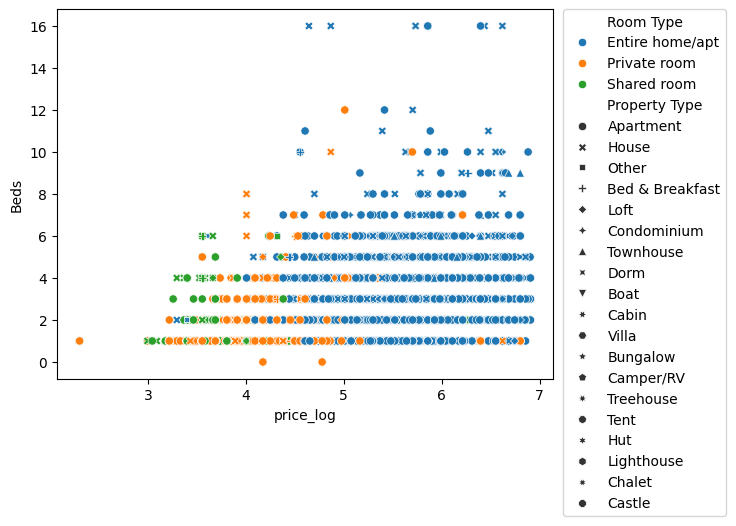

                                   count        mean         std    min  \
Room Type       Property Type                                             
Entire home/apt Apartment        15550.0  200.210161  109.967435   10.0   
                Bed & Breakfast     13.0  184.538462  119.814172   85.0   
                Boat                 7.0  158.428571   51.110524  100.0   
                Bungalow             4.0  150.750000   46.464144   87.0   
                Cabin                1.0  250.000000         NaN  250.0   
                Camper/RV            6.0  114.333333  107.685963   45.0   
                Condominium         71.0  281.126761  175.313998   80.0   
                Dorm                 4.0   44.250000   24.060687   30.0   
                House              723.0  234.554633  159.785974   27.0   
                Lighthouse           1.0   39.000000         NaN   39.0   
                Loft               379.0  284.910290  184.515517   55.0   
                Other    

In [64]:
# 6
sns.scatterplot(data=df2, x='price_log', y='Beds', hue='Room Type', style='Property Type')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()
print(df2.groupby(['Room Type', 'Property Type'])['Price'].describe())

### The highest priced room types are entire homes/apartments, on average. The 'Other' property type has the highest average price level. It is followed by the property type of 'Lofts', second to the 'Other' property type in terms of average price levels.

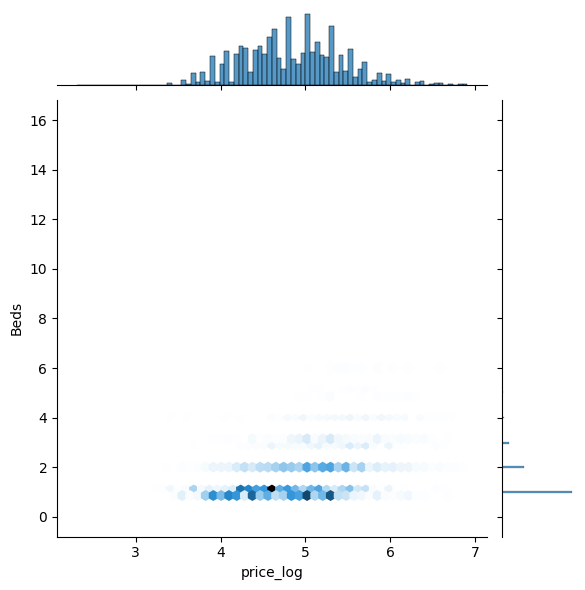

In [65]:
# 7
sns.jointplot(data=df2, x='price_log', y='Beds', kind='hex')
plt.show()

### The scatter plot in the center suggests that most of the airbnb listings only actually offer 1-2 beds. The number of beds offered are mostly clustered at 1-2 beds, with rare occasions where 3-4 beds. It also shows that the price is concentrated around the range of 4 to 5, a little to the higher price level range. Compared to the previous plots, the joint plot reveals that there are not much listings with bed availabilities greater than 4, which is contrary to what was previously portrayed.

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.